# Sensitivity Analysis

## This code is to create graphs and rankings of the sensitivity 

This is done for each relevant variable of the sensitivity analysis. By generating the input values and comparing them to output values, we can see the first order impacts of changing values of a variable across a real range of values.

In [1]:
import numpy as np
import pandas as pd

import ast  # for converting 'options' to list quickly

import matplotlib.pyplot as plt

### Loading all the data and schema

In [2]:
schema = pd.read_csv("./data/OPGEE_py_inputs.csv")                                              # read in the schema that defines baseline value, min, max, and options
clim_intensity = pd.read_csv("../OPGEEv4/opgee/etc/sensitivity/outputs/carbon_intensity.csv")   # read in the opgee outputs
opgee_in = pd.read_csv("../OPGEEv4/opgee/etc/sensitivity/sensitivity.csv")                      # read in the inputs for this opgee run

schema.index = schema['python_name']                                                            # set the dataframe's index to the variable name for ease
schema = schema[~np.isnan(schema['mapped'])][1:]                                                # temporary measure for reducing input options

ci_totals = clim_intensity[clim_intensity['node']=='TOTAL']                                     # only looking at total emissions intensity as a series
ci_series = ci_totals.set_index('field')['CI']                                                  # changing index to match 

opgee_in = opgee_in.set_index('python_name')
# opgee_in.loc[len(opgee_in)] = ['ci','float'] + ([np.nan] * (len(opgee_in.columns)-2))
# opgee_in = opgee_in.T

In [14]:
baseline_CI = ci_series.iloc[0] # accessing the baseline field emissions for reference
baseline_CI

28.48600219803141

In [1]:
# we want to add the climate intensity for each field as a new row
combined = opgee_in.T.merge(ci_series,left_index=True, right_index=True).T  # merging the intensity series with the opgee inputs

NameError: name 'opgee_in' is not defined

: 

### Moving carbon intensity results to new column in schema

In [4]:
results = []    # for list of lists

# Iterate through each value in the 'python_name' column of df1
for python_name in schema['python_name']:
    # Find all values in the 'CI' column of df2 where 'name' includes the substring
    # note: changed to "startswith" to account for places where substrings like "age" exist in other words
    matching_values = combined.T[combined.T['name'].str.startswith(python_name+'_')]['CI'].tolist()
    results.append((python_name, matching_values))  # add this to the results list

# create a new dataframe that matches the python name with each list of values
# add this to the schema so all aspects about each variable are available
results_df = pd.DataFrame(results, columns=['python_name', 'matching_CI'])
joined = schema.merge(results_df, left_index=True, right_on='python_name')

In [ ]:
# for testing
pd.set_option('display.max_rows', None)     
pd.set_option('display.max_columns', None)  

### Adding analysis columns

In [29]:
# creating new columns that analyze aspects about the values for each variable from the list
joined['min'] = joined['matching_CI'].apply(min)                                        # min value
joined['max'] = joined['matching_CI'].apply(max)                                        # max value
joined['avg_CI'] = joined['matching_CI'].apply(np.mean)                                 # average value
joined['delta'] = joined['max'] - joined['min']                                         # difference between min and max
joined['delta_change'] = abs(100*(joined['delta'] - joined['avg_CI'])/joined['avg_CI']) # percent change from the alpha

d_sorted = joined.sort_values(by='delta',ascending=False)                               # sorting by largest change
d_sorted.to_csv('./data/sorted_deltas.csv')                                             # writing this csv out
# d_sorted

### Graphing

ecosystem_richness is str


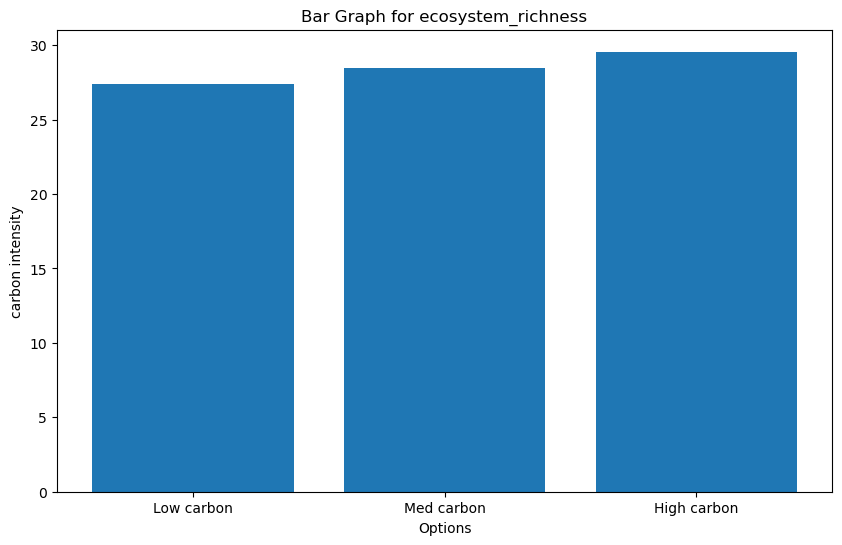

eta_rig is str


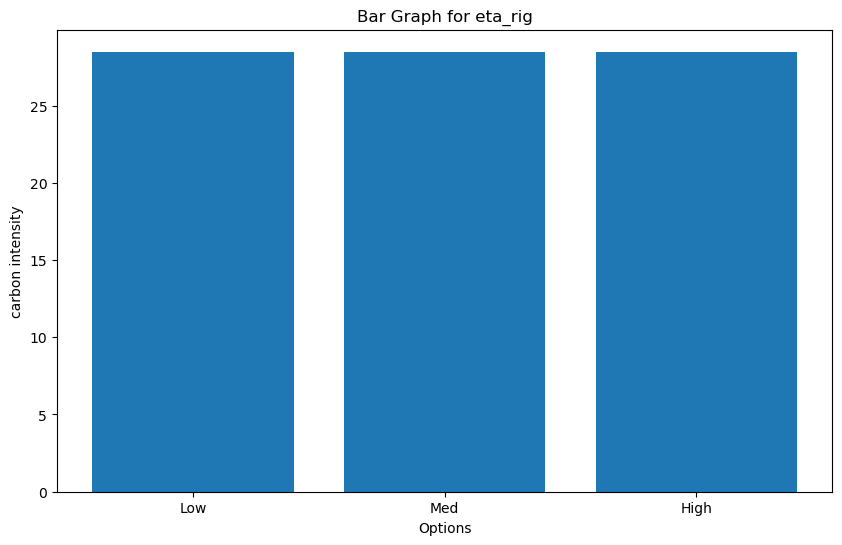

field_development_intensity is str


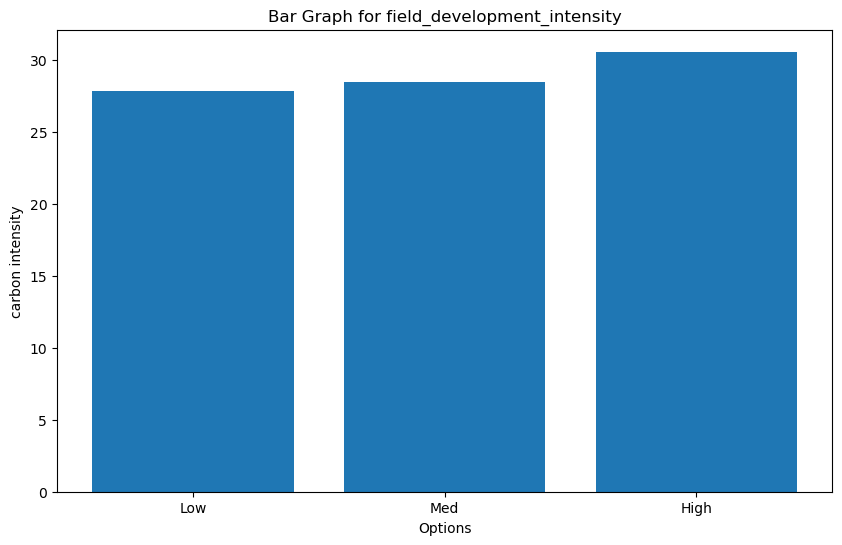

well_complexity is str


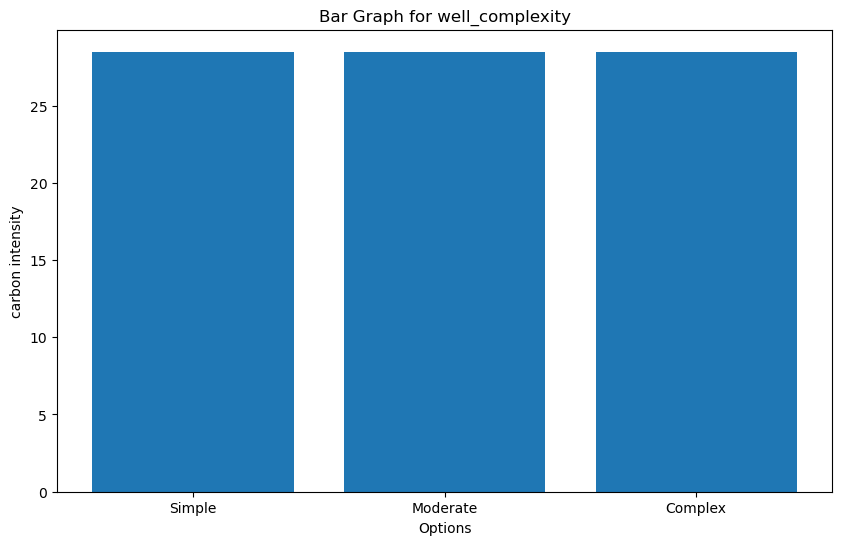

well_productivity_crude_oil is str


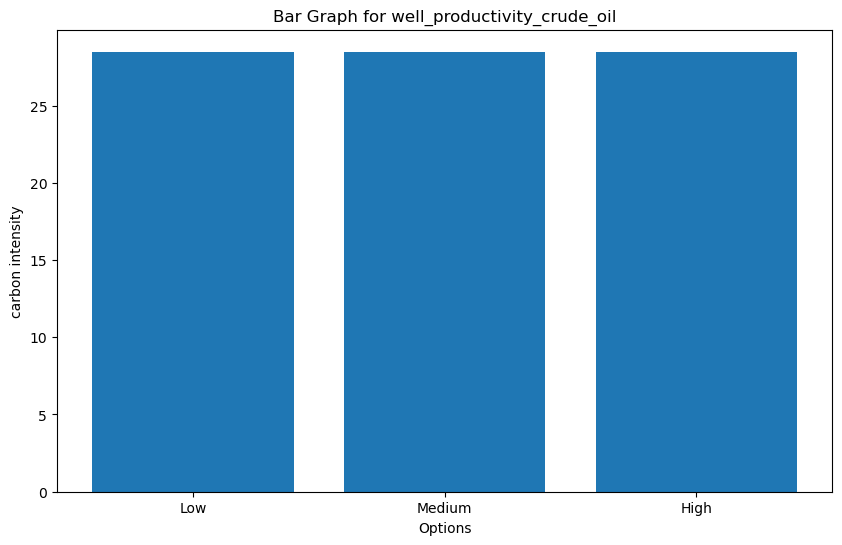

well_productivity_natural_gas is str


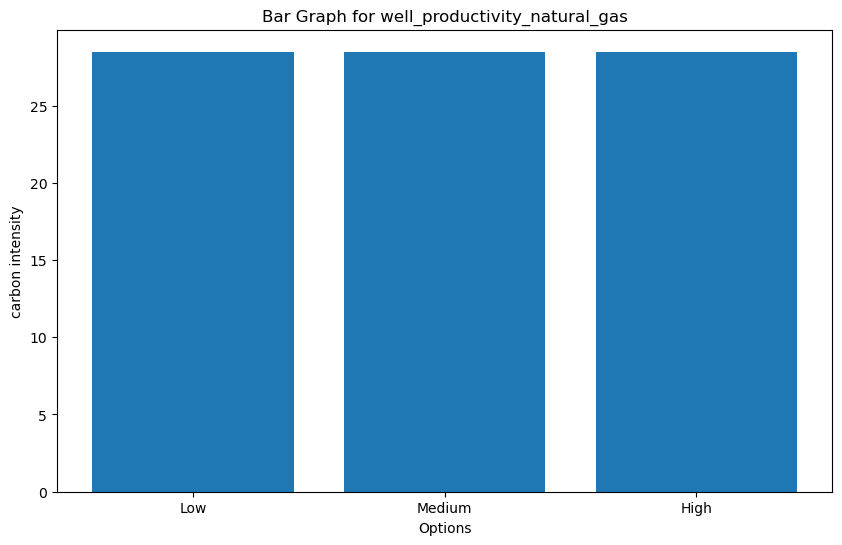

well_size is str


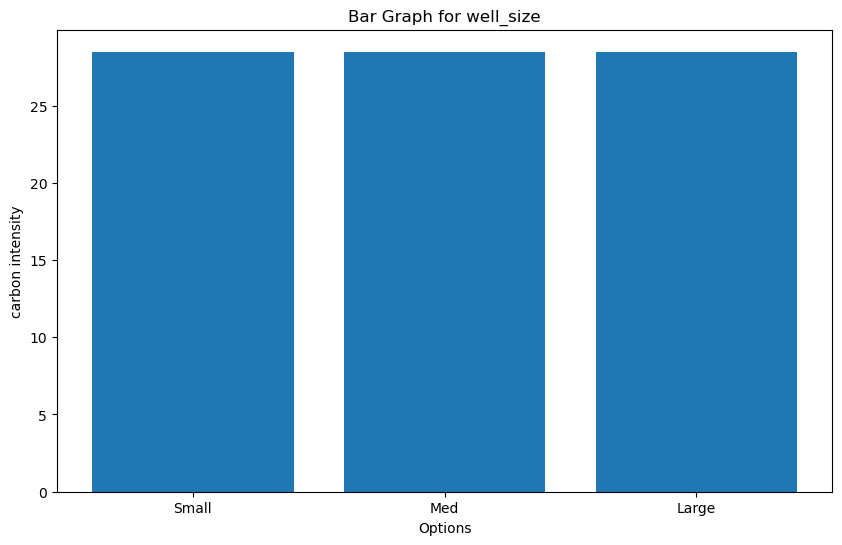

combusted_gas_frac is float
float here 70 to 100
[ 70.  80.  90. 100.]


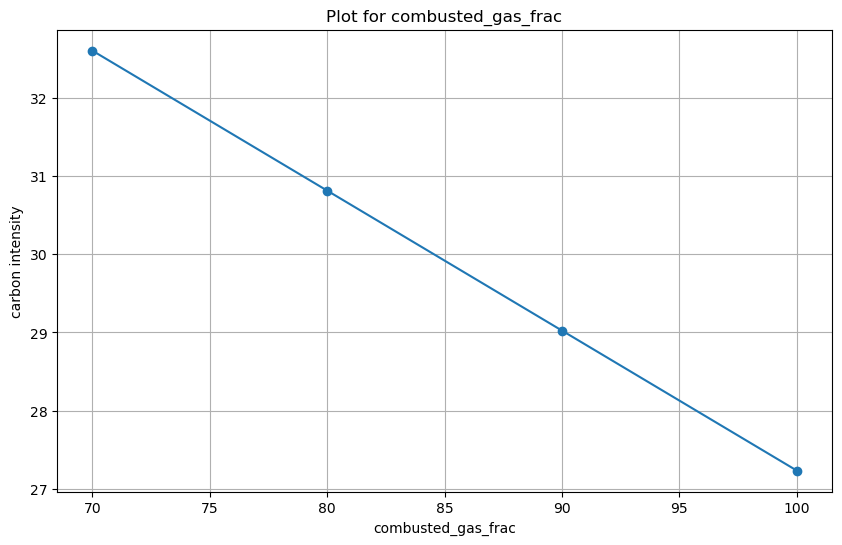

frac_venting is float
float here 0 to 0.3
[0.   0.06 0.12 0.18 0.24 0.3 ]


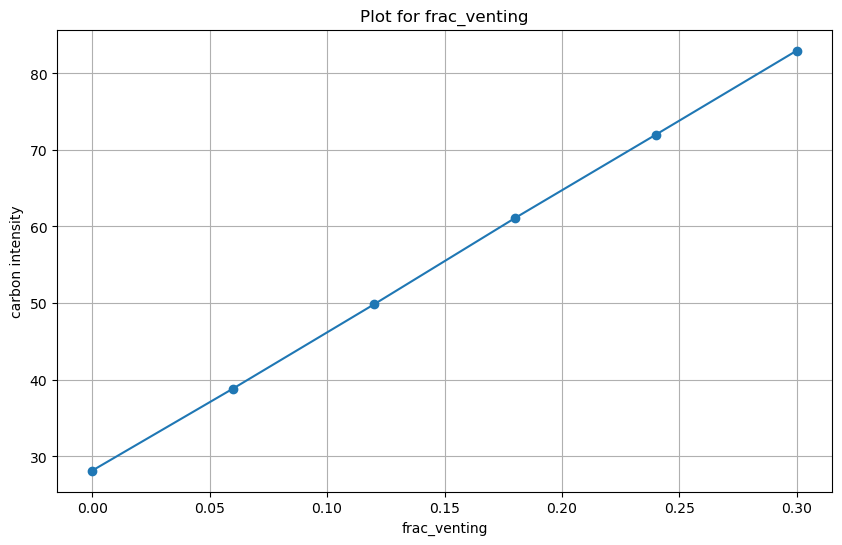

surface_piping_leakage is float
float here 0 to 3
[0. 1. 2. 3.]


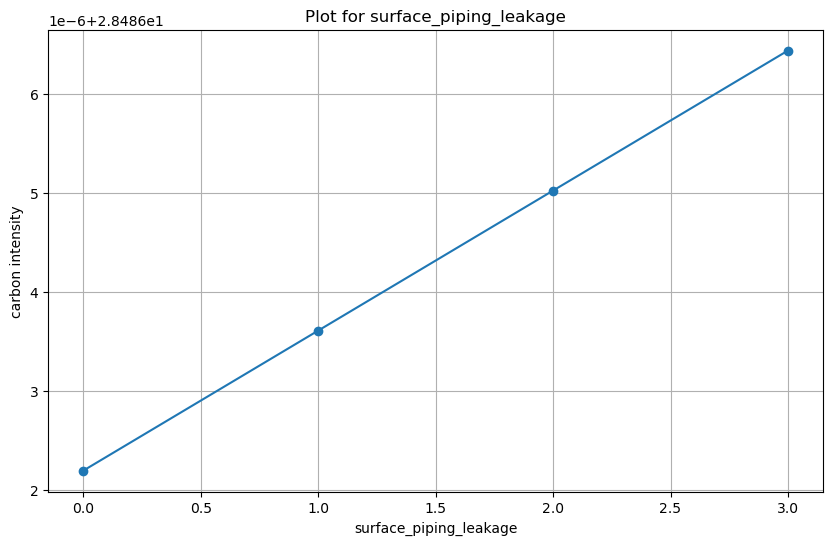

well_diam is float
float here 1 to 4
[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4. ]


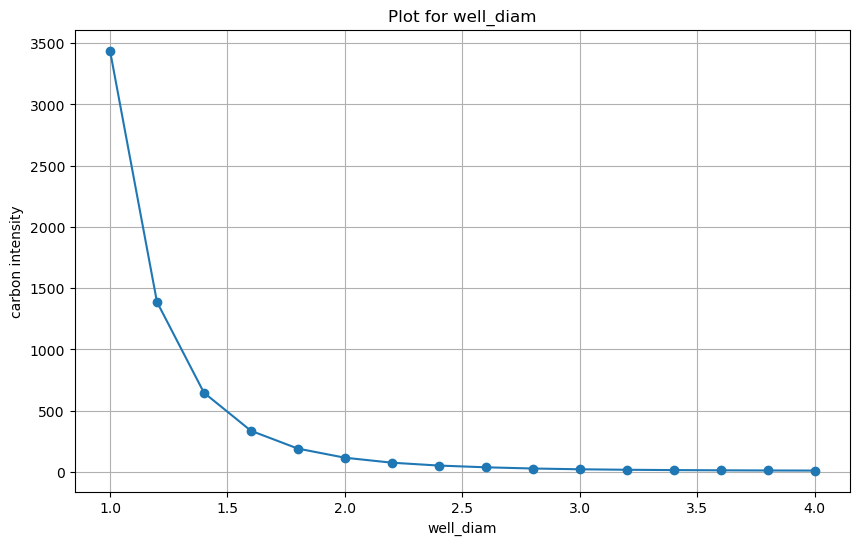

wellhead_pressure is int
int here 400 to 600


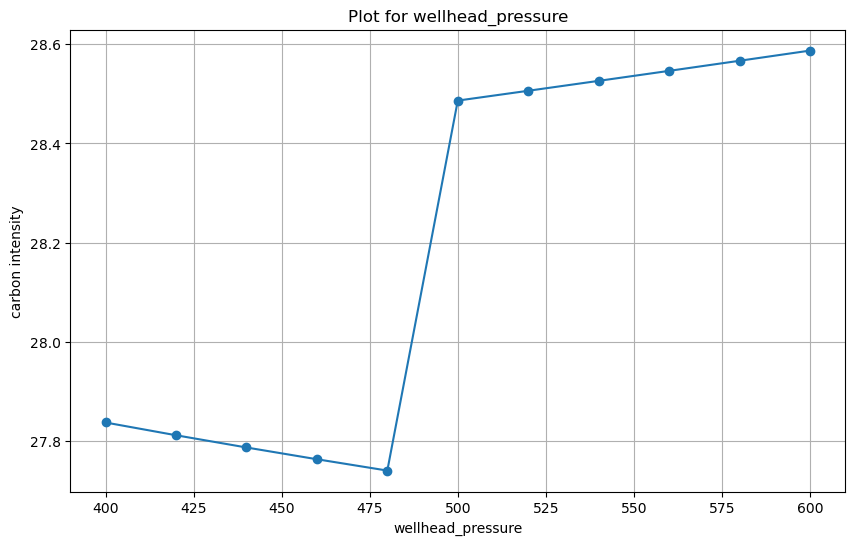

wellhead_temperature is int
int here 100 to 250


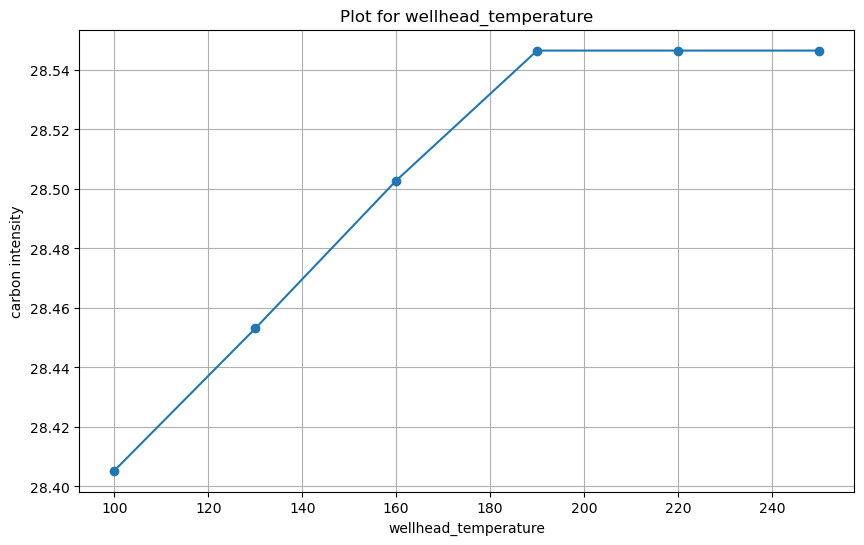

flaring_fracturing_flowback is int
int here 0 to 1


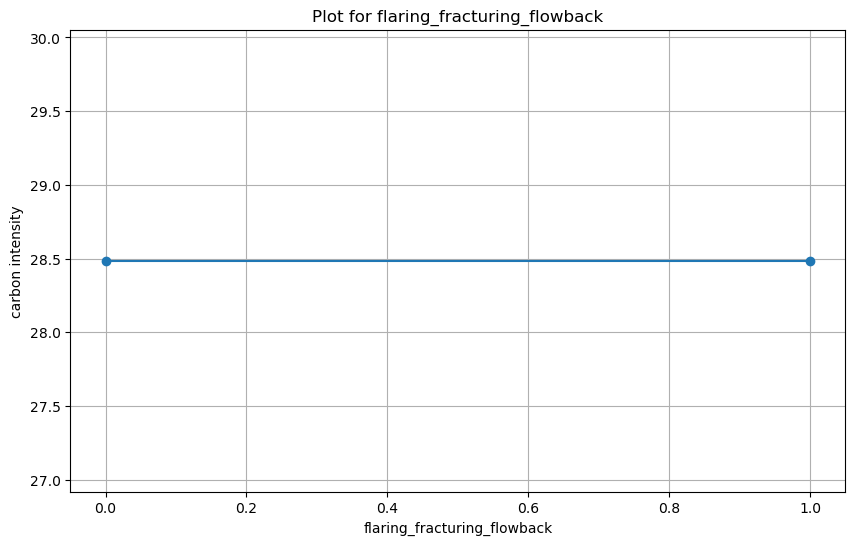

fraction_wells_horizontal is int
int here 0 to 1


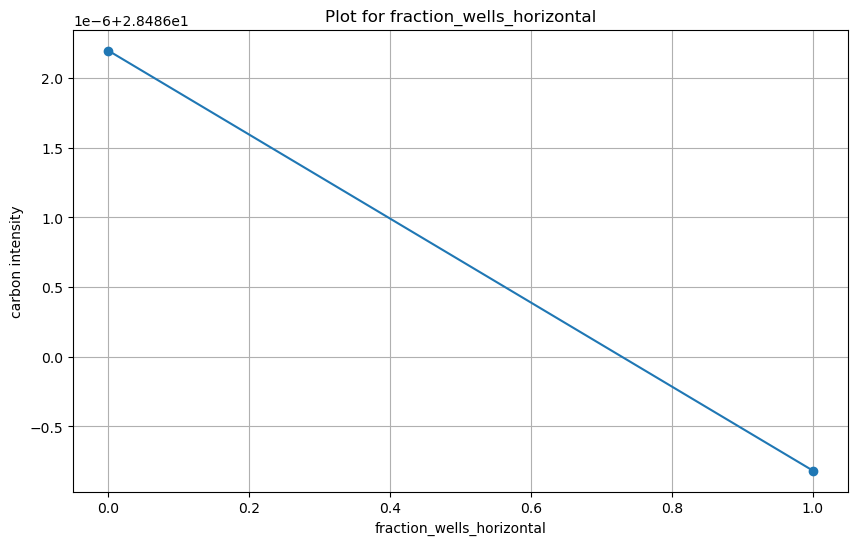

is_flaring is str


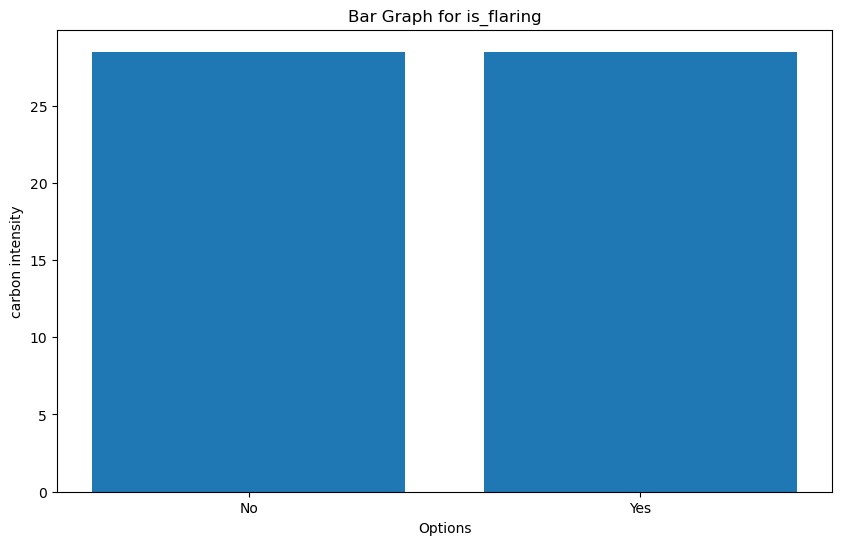

REC_fracturing_flowback is int
int here 0 to 1


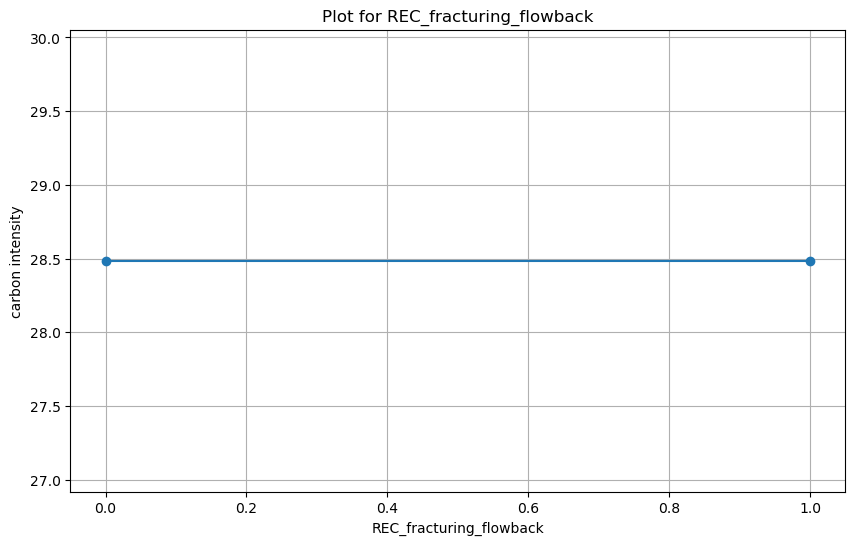

age is int
int here 1 to 151


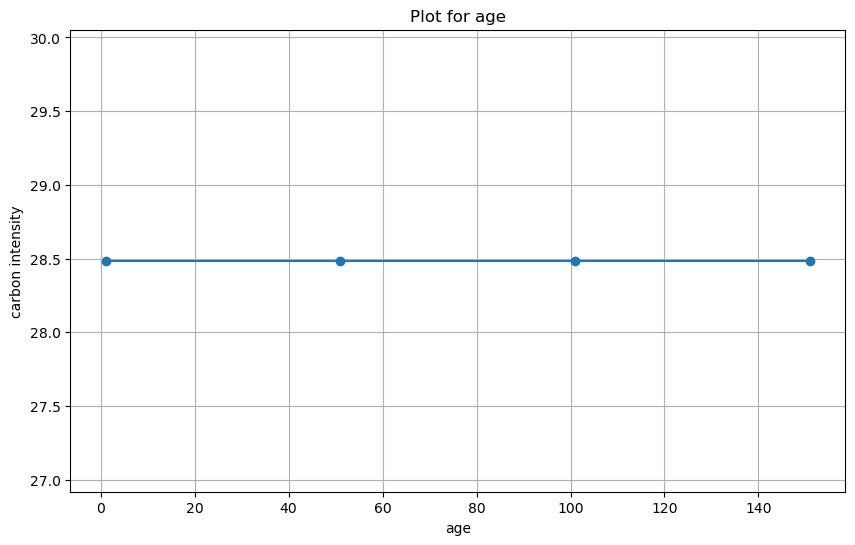

API is float
float here 1 to 86.19
[  1.  18.  35.  52.  69.  86. 103.]


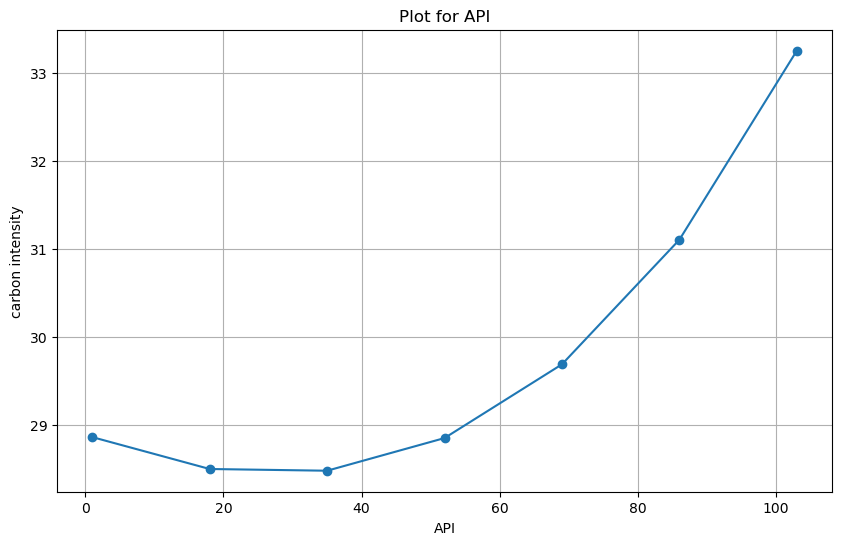

depth is float
float here 16.4 to 35030.4
[1.64000e+01 4.01640e+03 8.01640e+03 1.20164e+04 1.60164e+04 2.00164e+04
 2.40164e+04 2.80164e+04 3.20164e+04 3.60164e+04]


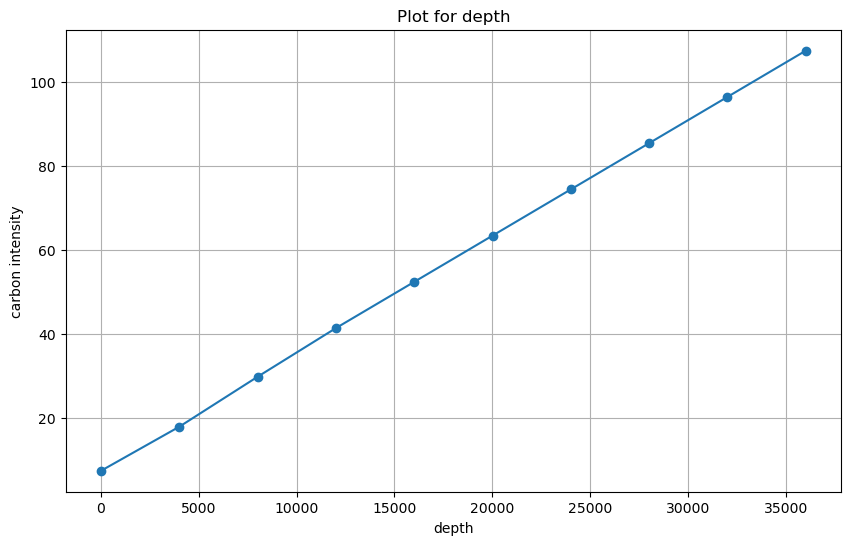

gas_comp_C1 is float
float here 0.01 to 99.54
[1.0000e-02 1.0010e+01 2.0010e+01 3.0010e+01 4.0010e+01 5.0010e+01
 6.0010e+01 7.0010e+01 8.0010e+01 9.0010e+01 1.0001e+02]


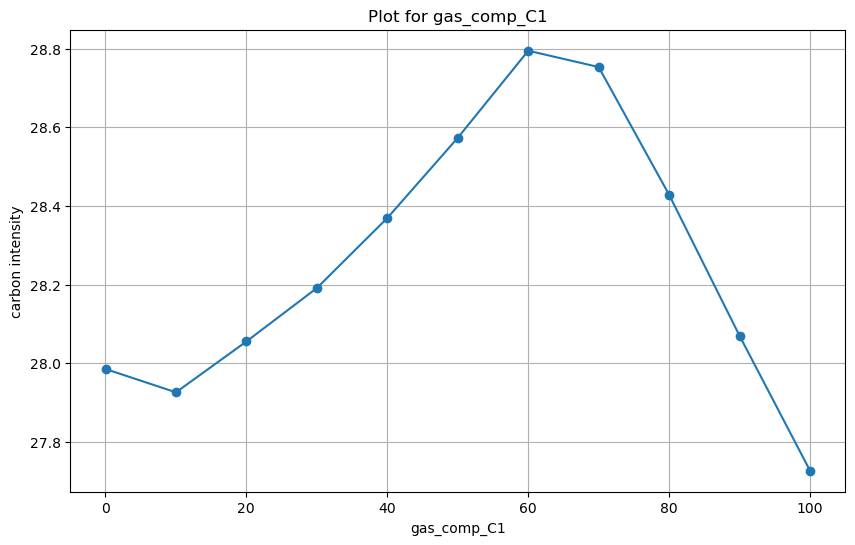

gas_comp_C2 is float
float here 0.001 to 37
[1.0000e-03 5.0010e+00 1.0001e+01 1.5001e+01 2.0001e+01 2.5001e+01
 3.0001e+01 3.5001e+01 4.0001e+01]


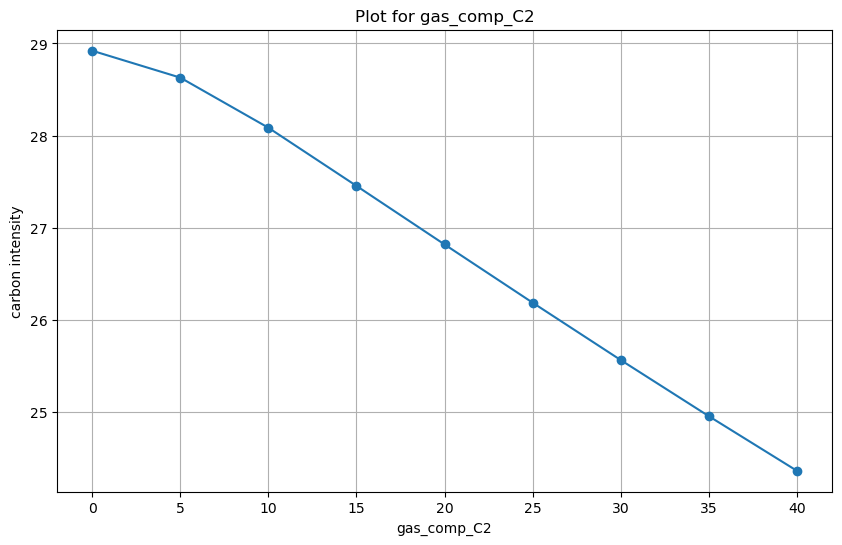

gas_comp_C3 is float
float here 0.001 to 49
[1.0000e-03 1.0001e+01 2.0001e+01 3.0001e+01 4.0001e+01 5.0001e+01]


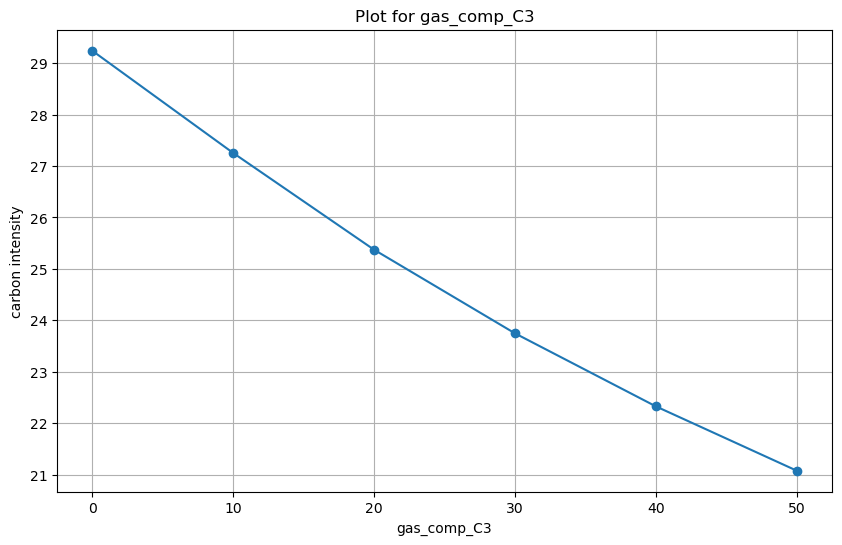

gas_comp_C4 is float
float here 0.0005 to 17.3
[5.00000e-04 6.00050e+00 1.20005e+01 1.80005e+01]


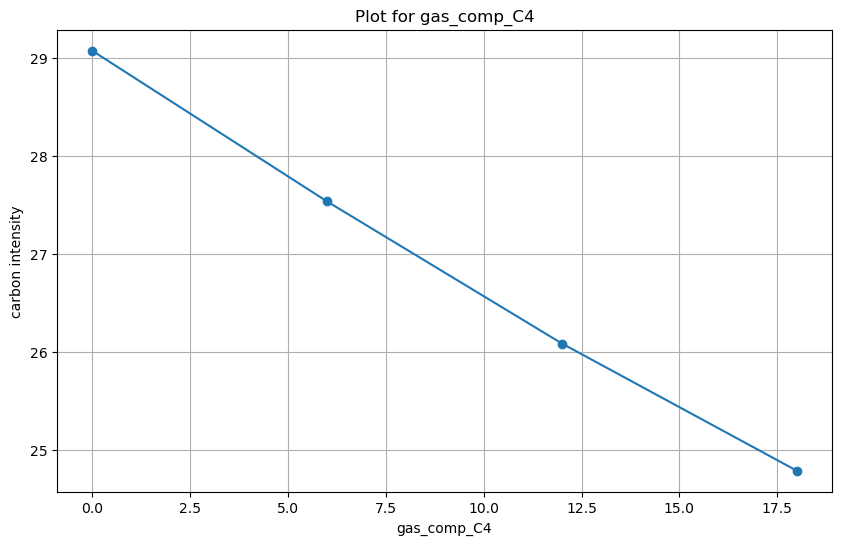

gas_comp_CO2 is float
float here 0 to 30
[ 0.  5. 10. 15. 20. 25. 30.]


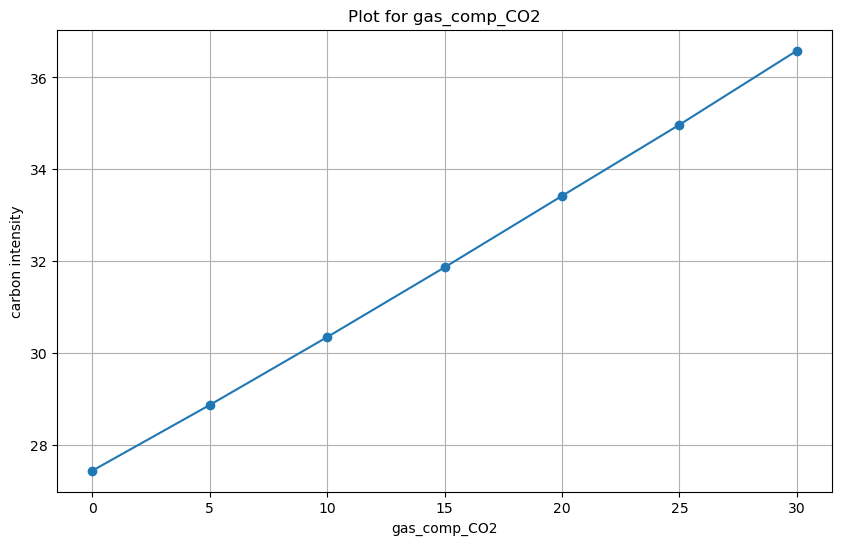

gas_comp_H2S is float
float here 0 to 5
[0. 1. 2. 3. 4. 5.]


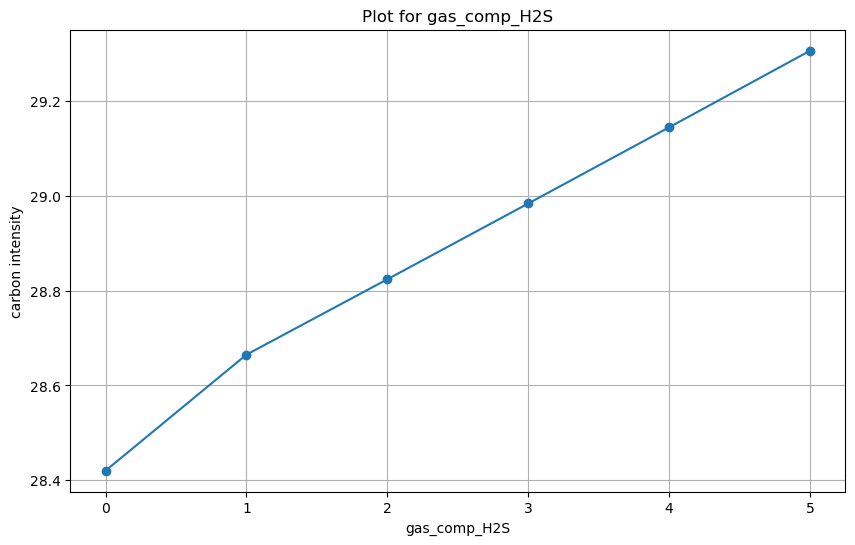

gas_comp_N2 is float
float here 0.01 to 21.2
[1.000e-02 4.010e+00 8.010e+00 1.201e+01 1.601e+01 2.001e+01 2.401e+01]


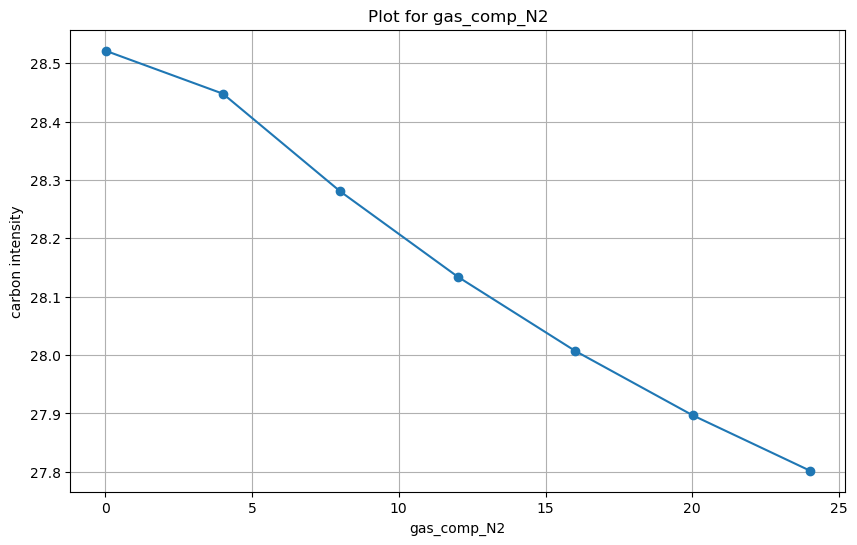

GOR is float
float here 1 to 100001
[1.00000e+00 2.00100e+03 4.00100e+03 6.00100e+03 8.00100e+03 1.00010e+04
 1.20010e+04 1.40010e+04 1.60010e+04 1.80010e+04 2.00010e+04 2.20010e+04
 2.40010e+04 2.60010e+04 2.80010e+04 3.00010e+04 3.20010e+04 3.40010e+04
 3.60010e+04 3.80010e+04 4.00010e+04 4.20010e+04 4.40010e+04 4.60010e+04
 4.80010e+04 5.00010e+04 5.20010e+04 5.40010e+04 5.60010e+04 5.80010e+04
 6.00010e+04 6.20010e+04 6.40010e+04 6.60010e+04 6.80010e+04 7.00010e+04
 7.20010e+04 7.40010e+04 7.60010e+04 7.80010e+04 8.00010e+04 8.20010e+04
 8.40010e+04 8.60010e+04 8.80010e+04 9.00010e+04 9.20010e+04 9.40010e+04
 9.60010e+04 9.80010e+04 1.00001e+05]


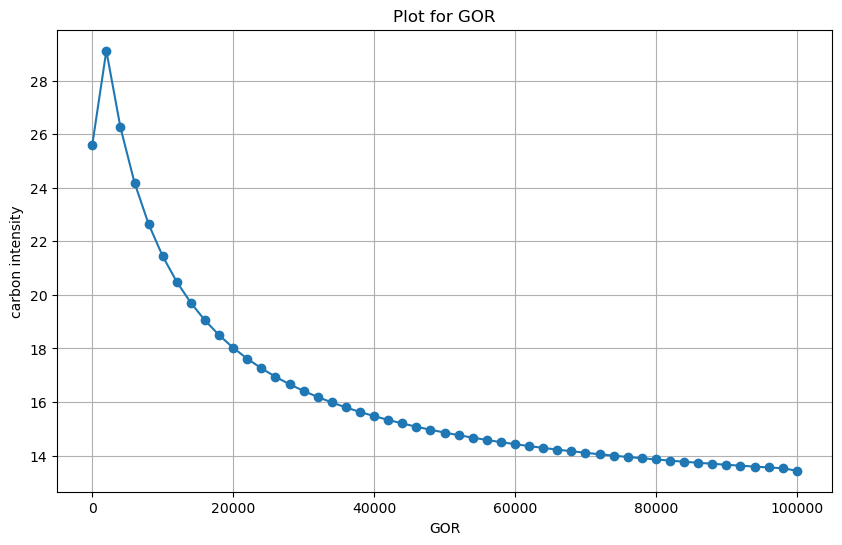

oil_prod is float
float here 1 to 3560930001
[1.00000000e+00 1.00000001e+08 2.00000001e+08 3.00000001e+08
 4.00000001e+08 5.00000001e+08 6.00000001e+08 7.00000001e+08
 8.00000001e+08 9.00000001e+08 1.00000000e+09 1.10000000e+09
 1.20000000e+09 1.30000000e+09 1.40000000e+09 1.50000000e+09
 1.60000000e+09 1.70000000e+09 1.80000000e+09 1.90000000e+09
 2.00000000e+09 2.10000000e+09 2.20000000e+09 2.30000000e+09
 2.40000000e+09 2.50000000e+09 2.60000000e+09 2.70000000e+09
 2.80000000e+09 2.90000000e+09 3.00000000e+09 3.10000000e+09
 3.20000000e+09 3.30000000e+09 3.40000000e+09 3.50000000e+09
 3.60000000e+09]


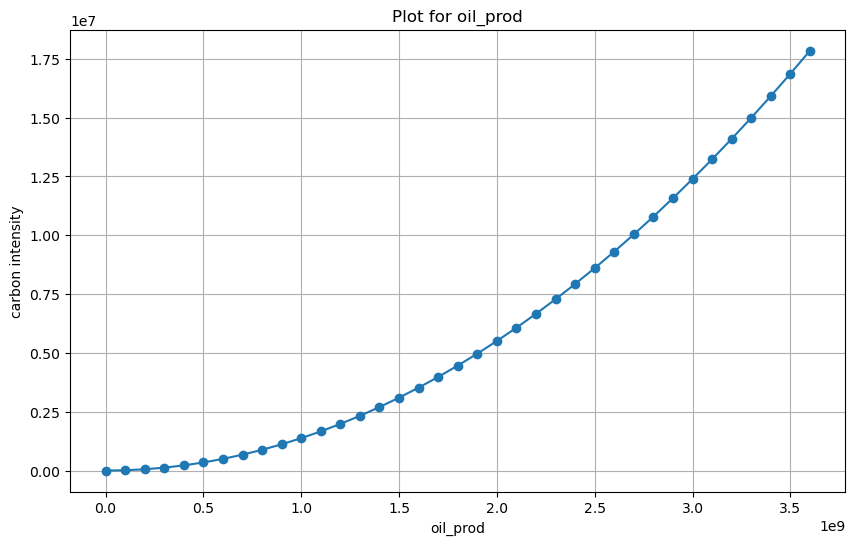

res_press is float
float here 15 to 12291
[   15.  1015.  2015.  3015.  4015.  5015.  6015.  7015.  8015.  9015.
 10015. 11015. 12015. 13015.]


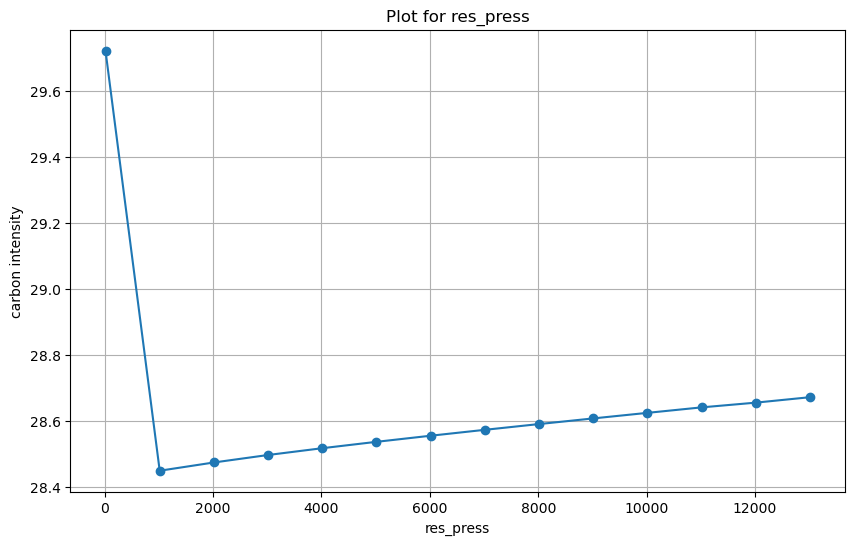

res_temp is float
float here 26 to 395.6
[ 26.  46.  66.  86. 106. 126. 146. 166. 186. 206. 226. 246. 266. 286.
 306. 326. 346. 366. 386. 406.]


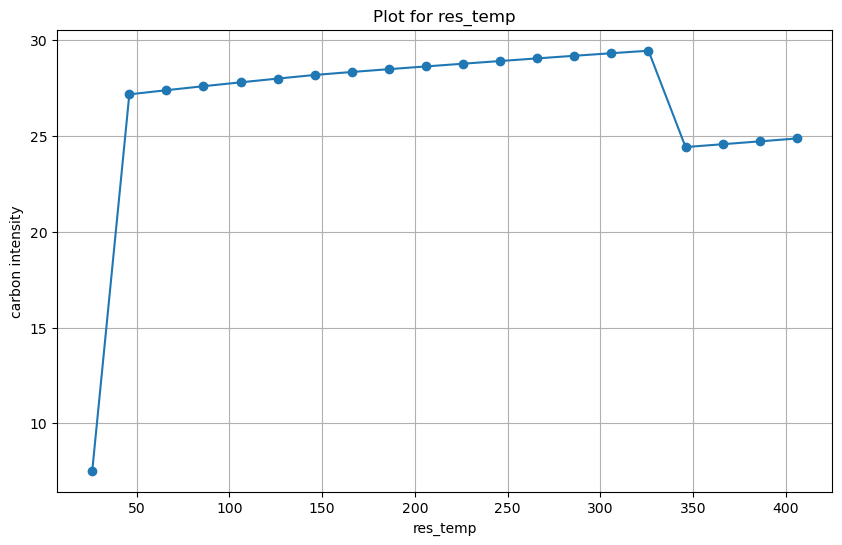

transport_dist_barge is float
float here 50 to 5000
[  50.  550. 1050. 1550. 2050. 2550. 3050. 3550. 4050. 4550. 5050.]


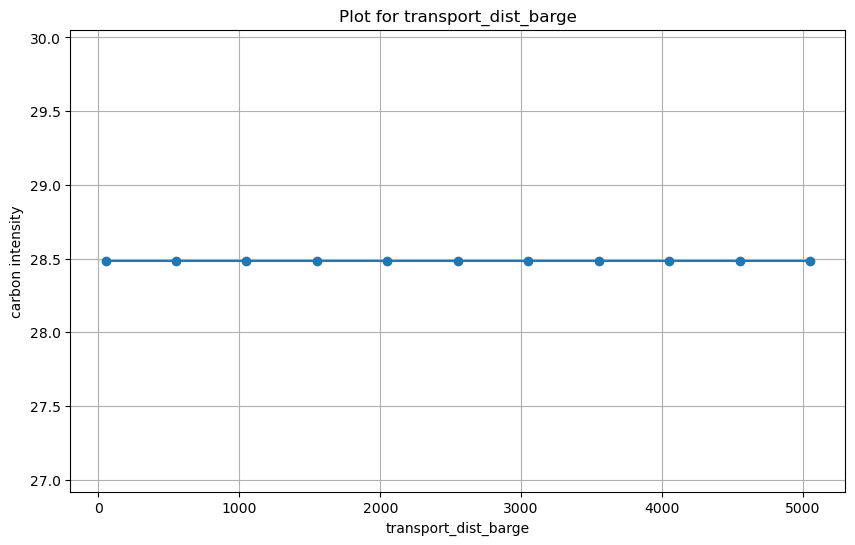

transport_dist_pipeline is float
float here 75 to 7500
[  75.  825. 1575. 2325. 3075. 3825. 4575. 5325. 6075. 6825. 7575.]


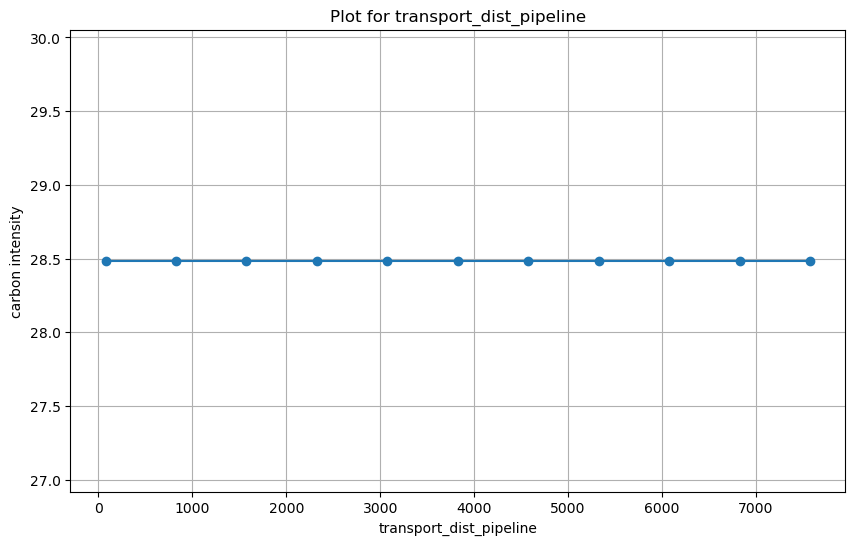

transport_dist_rail is float
float here 80 to 8000
[  80.  880. 1680. 2480. 3280. 4080. 4880. 5680. 6480. 7280. 8080.]


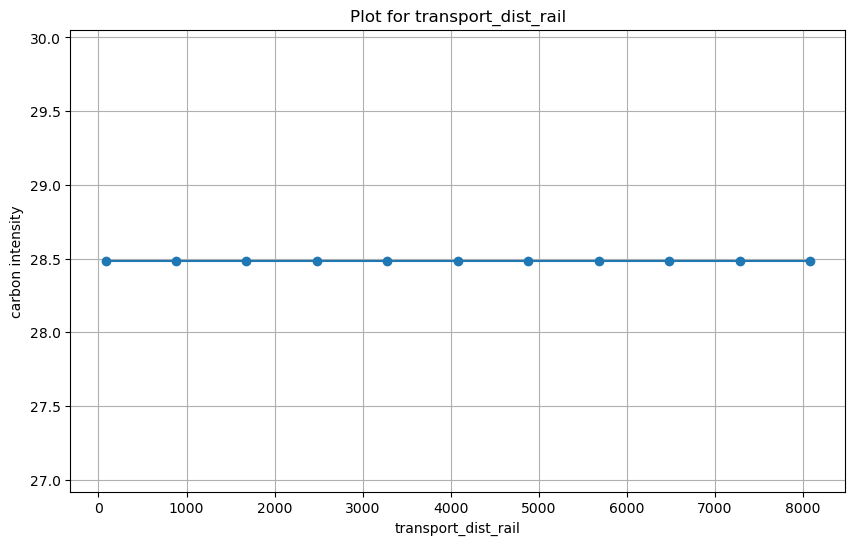

transport_dist_tanker is float
float here 508 to 50820
[  508.  5590. 10672. 15754. 20836. 25918. 31000. 36082. 41164. 46246.
 51328.]


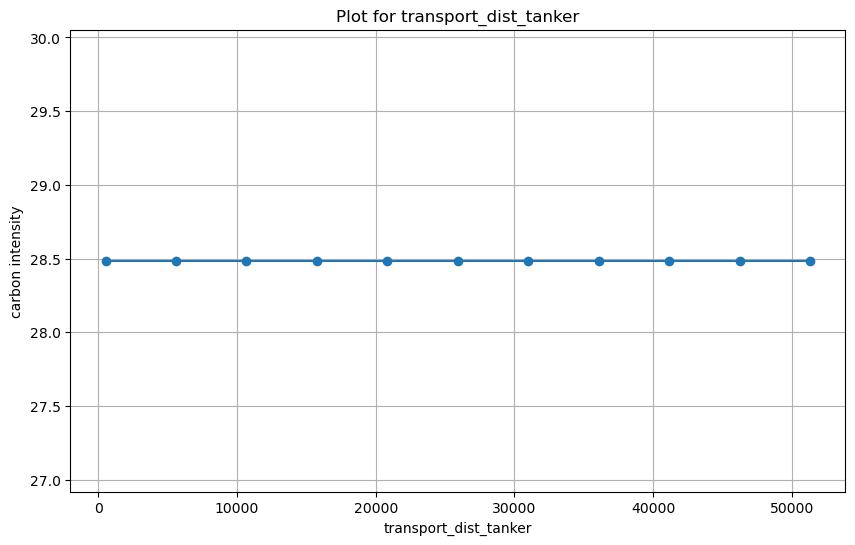

transport_dist_truck is float
float here 10 to 1000
[  10.  110.  210.  310.  410.  510.  610.  710.  810.  910. 1010.]


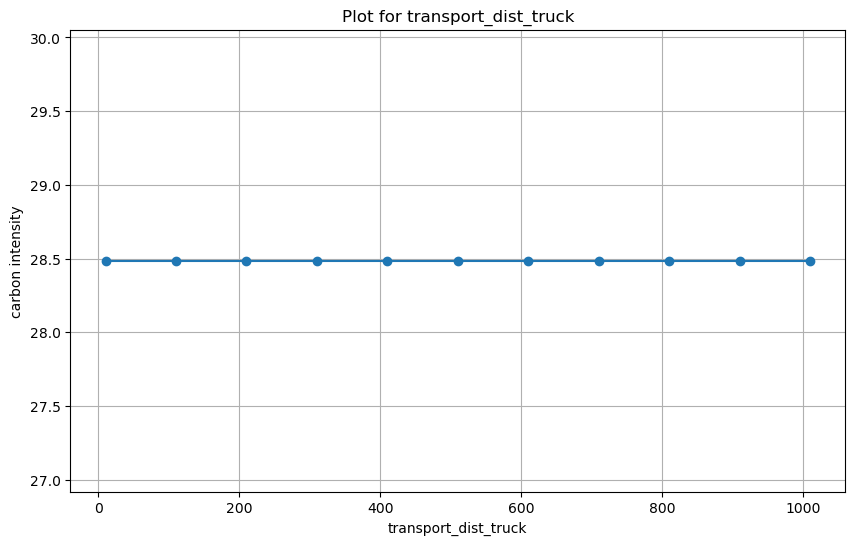

WOR is float
float here 0.1 to 20.1
[ 0.1  1.1  2.1  3.1  4.1  5.1  6.1  7.1  8.1  9.1 10.1 11.1 12.1 13.1
 14.1 15.1 16.1 17.1 18.1 19.1 20.1]


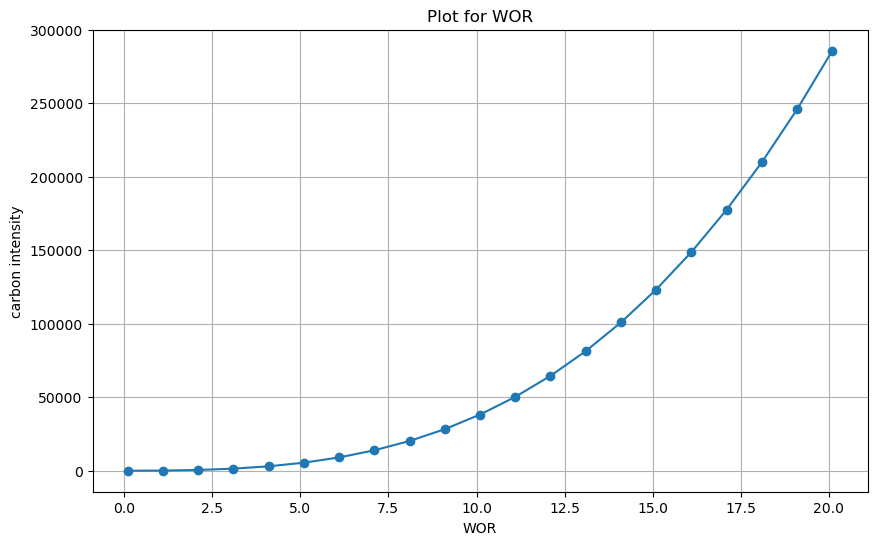

FOR is float
float here 0 to 80265.1267
[    0.  3000.  6000.  9000. 12000. 15000. 18000. 21000. 24000. 27000.
 30000. 33000. 36000. 39000. 42000. 45000. 48000. 51000. 54000. 57000.
 60000. 63000. 66000. 69000. 72000. 75000. 78000. 81000.]


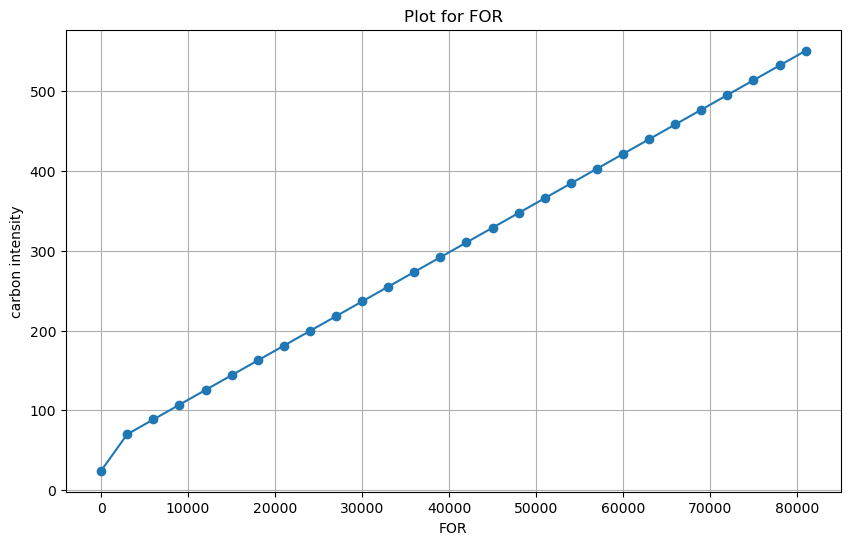

fraction_elec_onsite is float
float here 0 to 1
[0.  0.2 0.4 0.6 0.8 1. ]


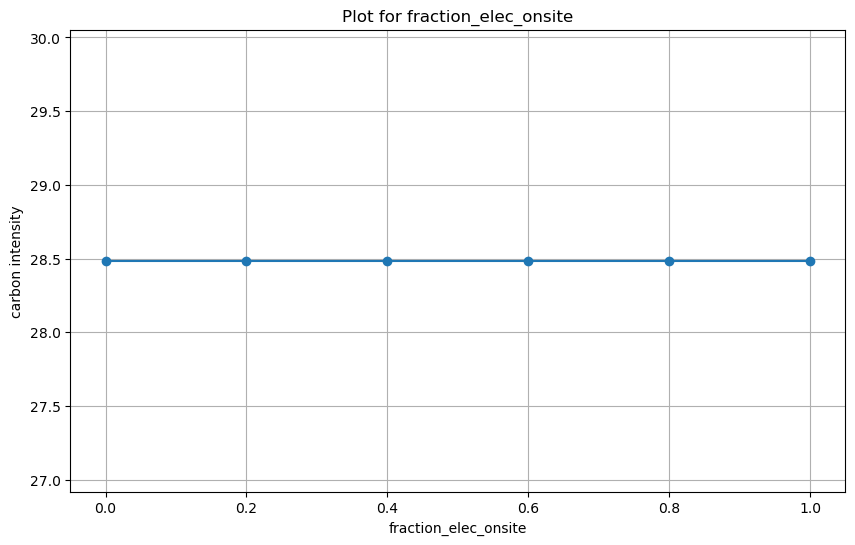

fraction_wells_fractured is int
int here 0 to 1


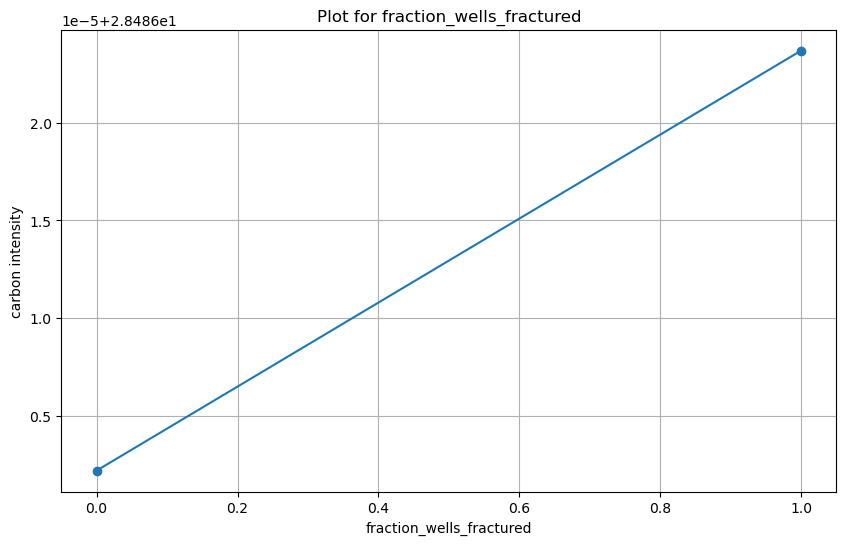

frac_transport_barge is float
float here 0 to 1
[0. 1.]


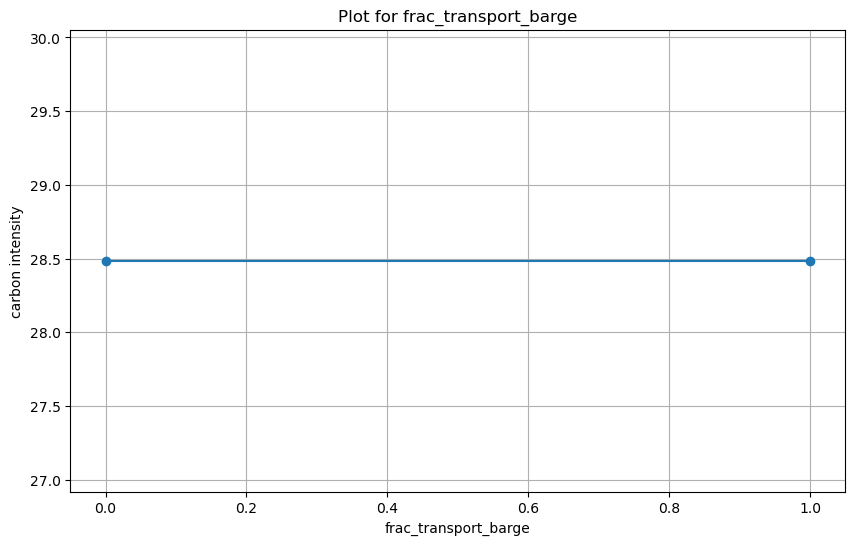

frac_transport_pipeline is float
float here 0 to 1
[0. 1.]


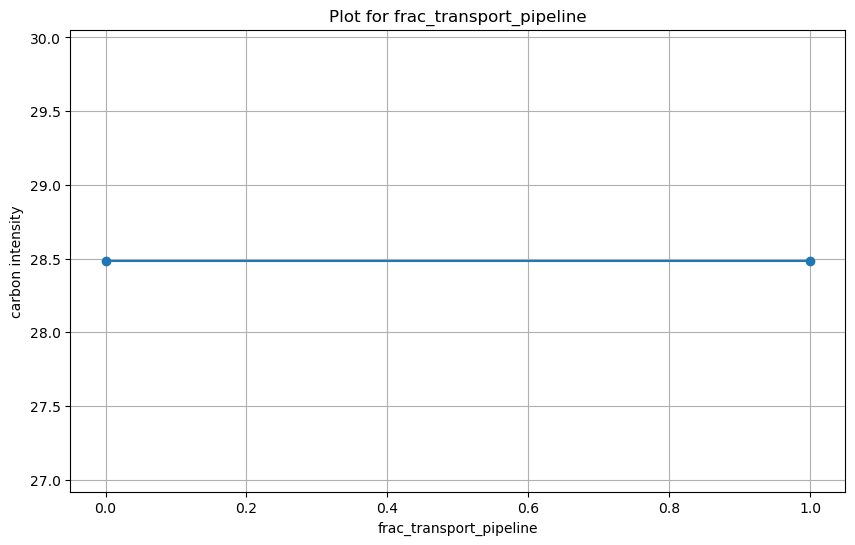

frac_transport_rail is float
float here 0 to 1
[0. 1.]


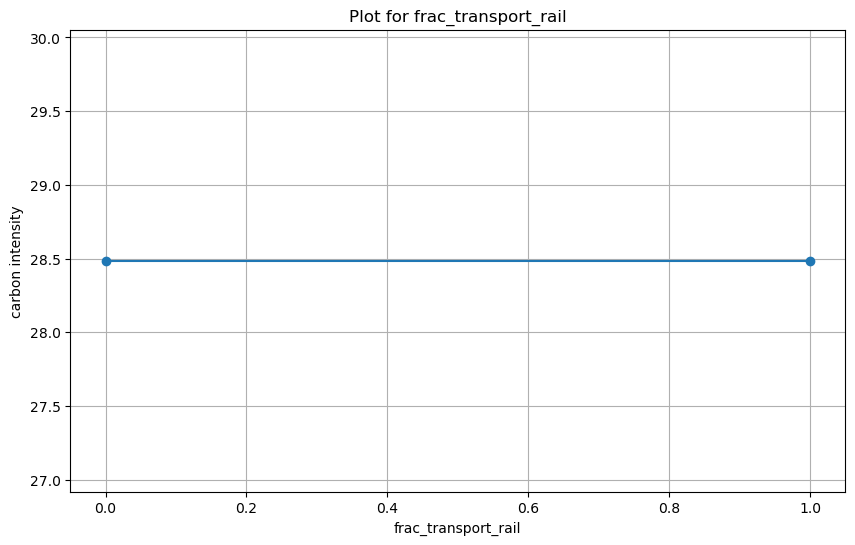

frac_transport_tanker is float
float here 0 to 1
[0. 1.]


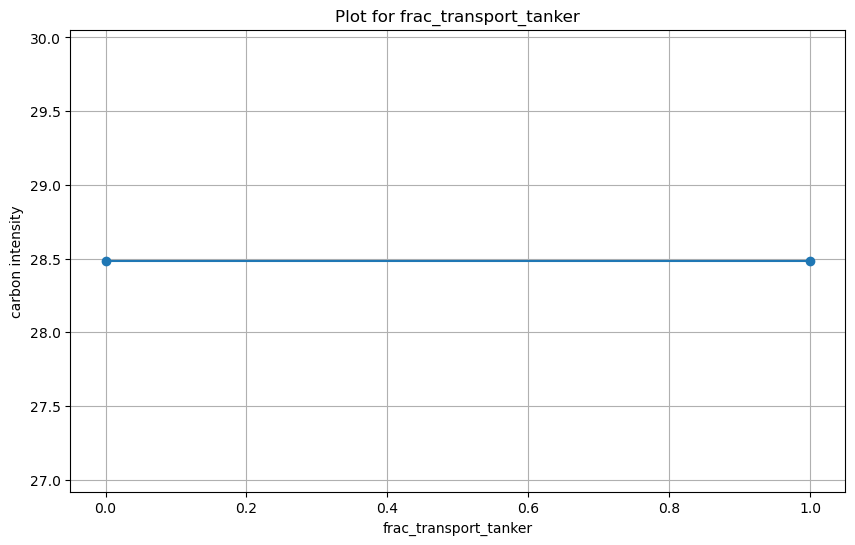

frac_transport_truck is float
float here 0 to 1
[0. 1.]


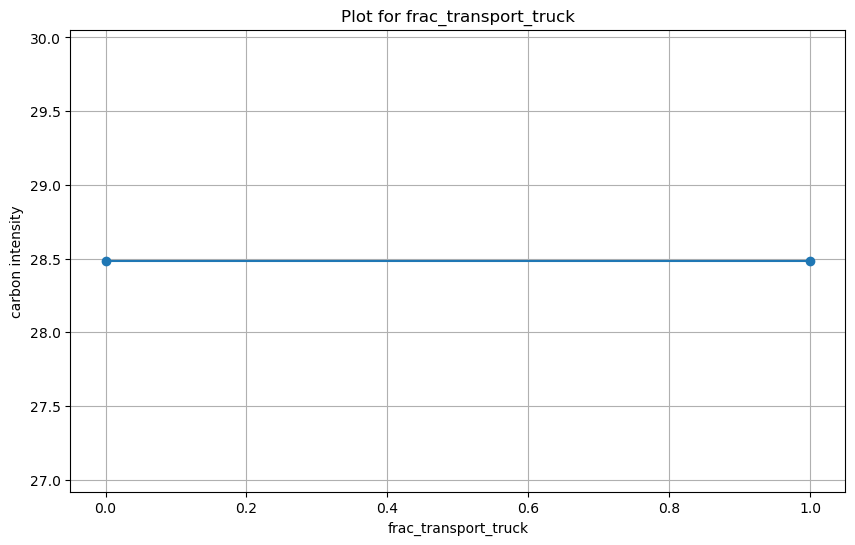

num_prod_wells is int
int here 1 to 500


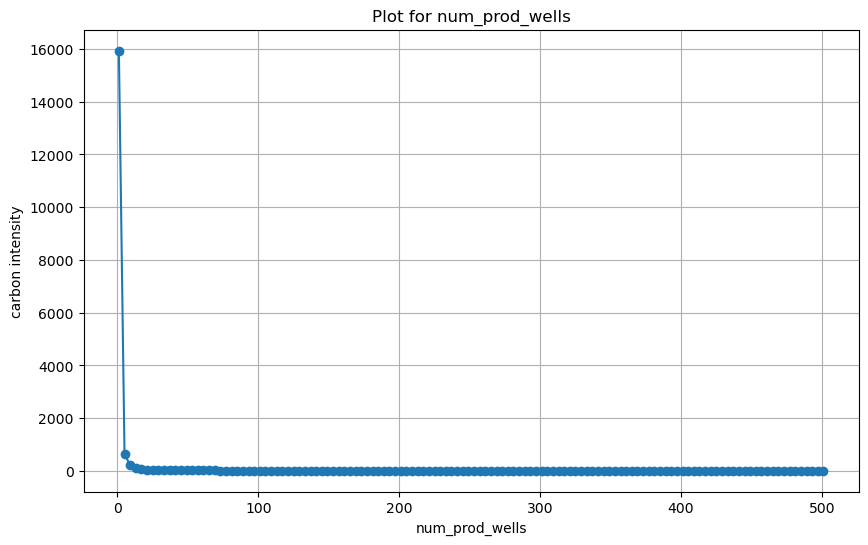

gas_processing_path is str


C:\Users\jmsta\AppData\Local\Temp\ipykernel_23484\3493558449.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(row['options'], rotation=45, ha='right')


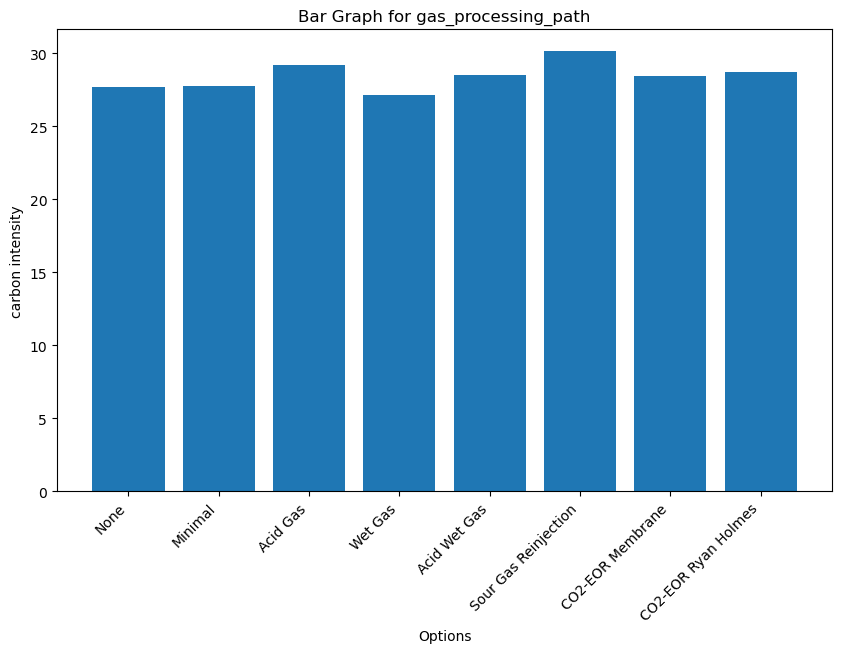

In [25]:
# Plotting line graphs for each variable
# Uses bar graph for categorical
for index, row in joined.iterrows():

    fig, ax = plt.subplots(figsize=(10, 6))

    # print(row['python_name'],'is',row["Type"])

    # -----------------------------------------------------------------------------------------------------------------------------------------
    if row['Type']=='str' and '[' in row['options']:                            # if categorical variable 

        row['options'] = ast.literal_eval(row['options'])                       # converts the 'str' in the options column to a list of strings

        try:                                                                    # looks for errors caused my non matching number of indices

            plt.bar(row['options'], row['matching_CI'])                         # create a bar graph titled with variable name
            plt.title(f'Bar Graph for {joined.at[index,'python_name']}')        
            ax.set_xlabel('Options')

            if row['python_name'] == 'gas_processing_path':                     # this one has many categories 
                ax.set_xticklabels(row['options'], rotation=45, ha='right')
            
            ax.set_ylabel('carbon intensity')
            plt.show()

        except Exception as error:                                              # error handling
            print("An exception occurred:", error)
            print("name number", index)
    # -----------------------------------------------------------------------------------------------------------------------------------------
    elif row['Type']=='int':                                                    # if variable is an int to make sure not to pass a float     

        try:                                                                    # looks for possible errors of indexes            
            
            # create the x axis from the min, max, and step size in the df
            vals = np.arange(                                                   
                int(row['Min']),
                int(row['Max'])+int(row['step']),
                int(row['step'])
            )

            # create a labeled line plot using the list of values
            plt.plot(vals, row['matching_CI'],marker='o')                        
            plt.title(f'Plot for {joined.at[index,'python_name']}')
            plt.xlabel(row['python_name'])
            plt.ylabel('carbon intensity')
            plt.grid(True)
            plt.show()
            
        except Exception as error:                                              # error handling
            print("An exception occurred:", error)
            print("name number", index)

    # ----------------------------------------------------------------------------------------------------------------------------------------
    else:                                                                       # for plotting floats

        try:                                                                    # looks for possible errors of indexes

            # create the x axis from the min, max, and step size in the df
            vals = np.arange(       
                float(row['Min']),
                float(row['Max'])+float(row['step']),
                float(row['step'])
            )

            # create a labeled line plot usign the list of values
            plt.plot(vals, row['matching_CI'],marker='o')
            plt.title(f'Plot for {joined.at[index,'python_name']}')
            plt.xlabel(row['python_name'])
            plt.ylabel('carbon intensity')
            plt.grid(True)
            plt.show()

        except Exception as error:                                              # error handling
            print("An exception occurred:", error)
            print("name number", index)

In [30]:
17.31 + 0.01

17.32